In [196]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy.stats.mstats import winsorize

In [267]:
features = pd.read_csv('train.csv', sep=',')
print(features.describe())
for col in features.columns:
    print("{} ".format(col))
    
    if features[col].dtype==np.object:
        features[col] = features[col].apply(str.strip)
    print("{}".format(features[col].unique()),"\n")

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  24421.000000  2.442100e+04   24421.000000  24421.000000  24421.000000   
mean      38.587036  1.888204e+05      10.096515   1116.029974     86.547643   
std       13.677055  1.046917e+05       2.574488   7646.590185    399.096945   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175830e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.778240e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.365860e+05      13.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   3900.000000   

       hours-per-week    exceeds50K  
count    24421.000000  24421.000000  
mean        40.511609      0.239998  
std         12.367526      0.427091  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         4

In [238]:
features.info()
features.head(5)
features.isna().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 14 columns):
age               24421 non-null int64
workclass         24421 non-null object
fnlwgt            24421 non-null int64
education         24421 non-null object
education-num     24421 non-null int64
marital-status    24421 non-null object
occupation        24421 non-null object
relationship      24421 non-null object
sex               24421 non-null object
capital-gain      24421 non-null int64
capital-loss      24421 non-null int64
hours-per-week    24421 non-null int64
native-country    24421 non-null object
exceeds50K        24421 non-null int64
dtypes: int64(7), object(7)
memory usage: 2.6+ MB


False

In [269]:
mydata = features.copy()
#for col in features.columns:
#    mydata = mydata.drop(mydata[mydata[col]=='?'].index, axis=0)
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 14 columns):
age               24421 non-null int64
workclass         24421 non-null object
fnlwgt            24421 non-null int64
education         24421 non-null object
education-num     24421 non-null int64
marital-status    24421 non-null object
occupation        24421 non-null object
relationship      24421 non-null object
sex               24421 non-null object
capital-gain      24421 non-null int64
capital-loss      24421 non-null int64
hours-per-week    24421 non-null int64
native-country    24421 non-null object
exceeds50K        24421 non-null int64
dtypes: int64(7), object(7)
memory usage: 2.6+ MB


In [270]:
mydata = pd.get_dummies(mydata)
mydata.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,exceeds50K,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,30,147215,10,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,60,173960,13,0,0,42,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,52,105428,10,0,0,12,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,37,112497,13,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,63,137843,10,7298,0,48,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [271]:
labels = np.array(mydata['exceeds50K'])

In [272]:
mydata= mydata.drop('exceeds50K', axis = 1)

In [273]:
mydata = np.array(mydata)

In [274]:
train_features, test_features, train_labels, test_labels = train_test_split(mydata, labels, test_size = 0.01, random_state = 42)

In [185]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(train_features, train_labels)

In [275]:
logistic_model = LogisticRegression()
logistic_model.fit(train_features,train_labels)
    
    
predictions = logistic_model.predict(test_features)

In [277]:
predictions = rf.predict(test_features)
predictions_train = rf.predict(train_features)

In [276]:
err = 0
tp, fp, fn = 0, 0, 0
for index, predict in enumerate(predictions):
    if predict>0.5:
        err = err+abs(test_labels[index]-1)
        if test_labels[index]==1:
            tp = tp + 1
        else:
            fp = fp + 1
    else:
        err = err+test_labels[index]
        if test_labels[index]==1:
            fn = fn + 1
        
print(err)
p = tp/(tp+fp)
r = tp/(tp+fn)
f = 2*p*r/(p+r)

34


In [277]:
print(f, p, r)
print(fp+fn)

0.4999999999999999 0.7727272727272727 0.3695652173913043
34


In [160]:
test = pd.read_csv('test.csv')
test.info()
for col in test.columns:
    if test[col].dtype==np.object:
        test[col] = test[col].apply(str.strip)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 13 columns):
age               24421 non-null int64
workclass         24421 non-null object
fnlwgt            24421 non-null int64
education         24421 non-null object
education-num     24421 non-null int64
marital-status    24421 non-null object
occupation        24421 non-null object
relationship      24421 non-null object
sex               24421 non-null object
capital-gain      24421 non-null int64
capital-loss      24421 non-null int64
hours-per-week    24421 non-null int64
native-country    24421 non-null object
dtypes: int64(6), object(7)
memory usage: 2.4+ MB


In [205]:
test = pd.get_dummies(test)
test.info()
for col in test.columns:
    if col not in pd.get_dummies(features).columns:
        print(col)
test['native-country_?'] = test['native-country_?'] + test['native-country_Holand-Netherlands']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Columns: 103 entries, age to native-country_Yugoslavia
dtypes: int64(6), uint8(97)
memory usage: 3.4 MB
native-country_Holand-Netherlands


In [206]:

test = test.drop('native-country_Holand-Netherlands', axis=1)

In [207]:
predictions = rf.predict(test)

In [208]:
print(predictions)

[0.03 0.04 0.   ... 0.14 0.   0.1 ]


In [215]:
result = [0 if predict<0.5 else 1 for predict in predictions]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [221]:
resultSet = pd.DataFrame(result, columns=['prediction'])


In [222]:
resultSet.info()
resultSet.index += 1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 1 columns):
prediction    24421 non-null int64
dtypes: int64(1)
memory usage: 190.9 KB


In [223]:
resultSet

,prediction
1,0
2,0
3,0
4,0
5,0
...,...
24417,0
24418,1
24419,0
24420,0


In [224]:
resultSet.to_csv('result.csv', index_label='id')

In [259]:
mydata2 = features.copy()
features["native-country"].unique()

array(['United-States', 'Guatemala', 'Jamaica', '?', 'Germany', 'Japan',
       'India', 'Italy', 'England', 'El-Salvador', 'Mexico', 'Cuba',
       'Ireland', 'Puerto-Rico', 'Philippines', 'Taiwan', 'Canada',
       'Yugoslavia', 'Portugal', 'Peru', 'France', 'Poland', 'China',
       'Vietnam', 'Iran', 'South', 'Haiti', 'Honduras', 'Scotland',
       'Nicaragua', 'Trinadad&Tobago', 'Columbia', 'Thailand', 'Cambodia',
       'Dominican-Republic', 'Greece', 'Ecuador', 'Hong', 'Laos',
       'Outlying-US(Guam-USVI-etc)', 'Hungary'], dtype=object)

In [115]:
mydata2["native-country"] = mydata2["native-country"].apply(str.strip).replace("?",np.nan)
liste_1 =mydata2["native-country"]

for i in range(len(liste_1)):
    if pd.isnull(liste_1[i]):
        liste_1[i] = liste_1[i-1]
        
mydata2["native-country"].unique() 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['United-States', 'Guatemala', 'Jamaica', 'Germany', 'Japan',
       'India', 'Italy', 'England', 'El-Salvador', 'Mexico', 'Cuba',
       'Ireland', 'Puerto-Rico', 'Philippines', 'Taiwan', 'Canada',
       'Yugoslavia', 'Portugal', 'Peru', 'France', 'Poland', 'China',
       'Vietnam', 'Iran', 'South', 'Haiti', 'Honduras', 'Scotland',
       'Nicaragua', 'Trinadad&Tobago', 'Columbia', 'Thailand', 'Cambodia',
       'Dominican-Republic', 'Greece', 'Ecuador', 'Hong', 'Laos',
       'Outlying-US(Guam-USVI-etc)', 'Hungary'], dtype=object)

In [116]:
mydata2["occupation"] = mydata2["occupation"].apply(str.strip).replace("?",np.nan)
liste_2 =mydata2["occupation"]

for i in range(len(liste_2)):
    if pd.isnull(liste_2[i]):
        liste_2[i] = liste_2[i-1] if i>0 else liste_2[len(liste_2)-1]
        
mydata2["occupation"].unique() 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['Prof-specialty', 'Sales', 'Protective-serv', 'Craft-repair',
       'Farming-fishing', 'Exec-managerial', 'Other-service',
       'Adm-clerical', 'Transport-moving', 'Machine-op-inspct',
       'Tech-support', 'Handlers-cleaners', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [117]:
mydata2["workclass"] = mydata2["workclass"].apply(str.strip).replace("?",np.nan)
liste_3 =mydata2["workclass"]

for i in range(len(liste_3)):
    if pd.isnull(liste_3[i]):
        liste_3[i] = liste_3[i-1] if i>0 else liste_3[len(liste_3)-1]
        
mydata2["workclass"].unique() 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['Federal-gov', 'Private', 'State-gov', 'Self-emp-inc',
       'Self-emp-not-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

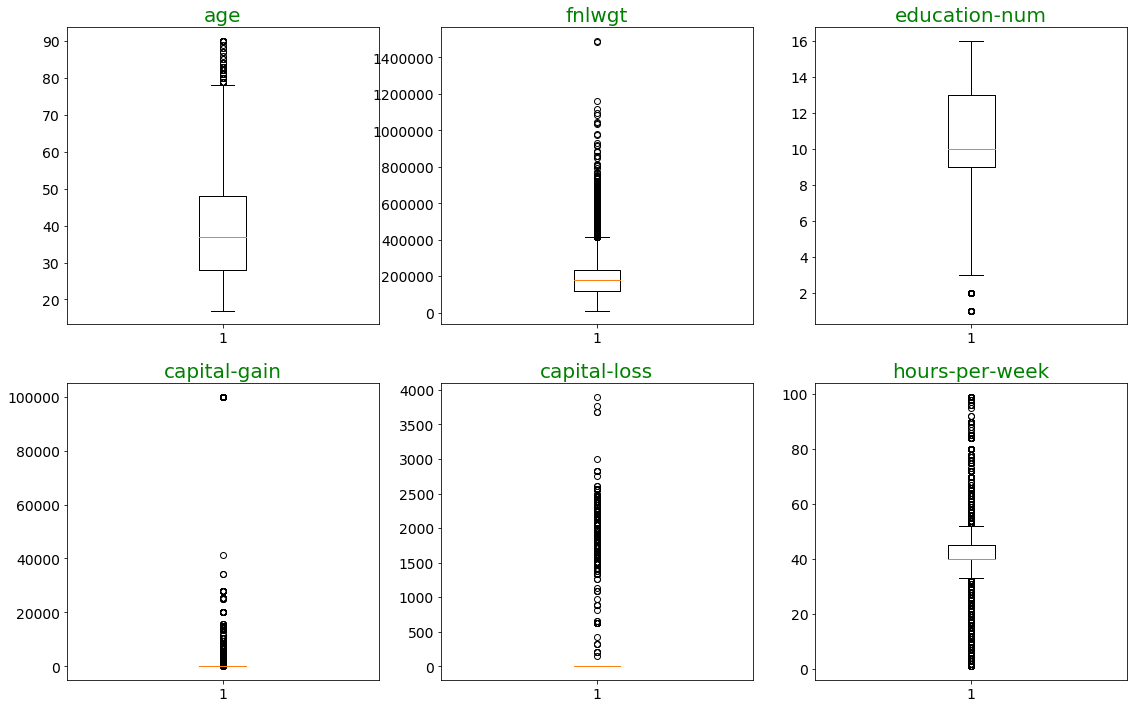

In [118]:

plt.figure(figsize=(19,12))
num_feat = mydata2.select_dtypes(include=['int64']).columns

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(mydata2[num_feat[i]])
    plt.title(num_feat[i],color="g",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)


plt.show()

In [260]:
from scipy.stats.mstats import winsorize
mydata2["age"]           = winsorize(mydata2["age"],(0,0.15))
mydata2["fnlwgt"]        = winsorize(mydata2["fnlwgt"],(0,0.15))
mydata2["capital-gain"]  = winsorize(mydata2["capital-gain"],(0,0.099))
mydata2["capital-loss"]  = winsorize(mydata2["capital-loss"],(0,0.099))
mydata2["hours-per-week"]= winsorize(mydata2["hours-per-week"],(0.12,0.18))

In [261]:
df = mydata2.copy()

In [262]:
df["woman?"]  = df.sex.replace({"Female":1,"Male":0})

In [263]:
df1 = pd.get_dummies(df['workclass'])
df2 = pd.get_dummies(df["education"])
df3 = pd.get_dummies(df["marital-status"])
df4 = pd.get_dummies(df["occupation"])
df5 = pd.get_dummies(df["relationship"])
df7 = pd.get_dummies(df["native-country"])

df  = pd.concat([df,df1,df2,df3,df4,df5,df7],axis=1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,30,?,147215,Some-college,10,Never-married,?,Own-child,Female,0,...,0,0,0,0,0,0,0,1,0,0
1,54,Private,173960,Bachelors,13,Divorced,Prof-specialty,Not-in-family,Female,0,...,0,0,0,0,0,0,0,1,0,0
2,52,?,105428,Some-college,10,Married-civ-spouse,?,Husband,Male,0,...,0,0,0,0,0,0,0,1,0,0
3,37,Private,112497,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,0,...,0,0,0,0,0,0,0,1,0,0
4,54,Private,137843,Some-college,10,Married-civ-spouse,Sales,Husband,Male,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24416,44,Private,104196,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Male,0,...,0,0,0,0,0,0,0,1,0,0
24417,52,Private,112959,Some-college,10,Widowed,Sales,Not-in-family,Female,0,...,0,0,0,0,0,0,0,1,0,0
24418,50,State-gov,263200,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,Female,0,...,0,0,0,0,0,0,0,0,0,0
24419,25,Private,228608,Some-college,10,Never-married,Craft-repair,Other-relative,Female,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
#df = pd.get_dummies(df)
df.head()
df['exceeds50K']

0        0
1        0
2        0
3        0
4        1
        ..
24416    1
24417    0
24418    0
24419    0
24420    1
Name: exceeds50K, Length: 24421, dtype: int64

In [264]:
y = df['exceeds50K']
X = df.drop(['exceeds50K', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'native-country'],axis=1)

In [265]:
sm = SMOTE(random_state=27)
X_smote, y_smote = sm.fit_sample(X,y)

KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

In [257]:
def make_model(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=111,stratify=y)
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train,y_train)
    
    
    predict_train = logistic_model.predict(X_train)
    predict_test = logistic_model.predict(X_test)
    confusion_matrix_train = confusion_matrix(y_train,predict_train)
    confusion_matrix_test  = confusion_matrix(y_test,predict_test)
    
    print("Model's Accuracy values       :",logistic_model.score(X_test,y_test))
    print("Model's Train f1_score values :",f1_score(y_train,predict_train))
    print("Model's Test  f1_score values :",f1_score(y_test,predict_test),"\n")
    print("TEST DATA SET")
    print(classification_report(y_test,predict_test))
    
    metrics =precision_recall_fscore_support(y_test,predict_test)

    print("Precision:",metrics[0])
    print("Racall   :",metrics[1])
    print("F1 Skoru :",metrics[2])
    
    return logistic_model

In [258]:
model = make_model(X_smote,y_smote)

[1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0
 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1
 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0
 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1
 1 0]
Model's Accuracy values       : 0.8306451612903226
Model's Train f1_score values : 0.8687187441499746
Model's Test  f1_score values : 0.8328912466843501 

TEST DATA SET
              precision    recall  f1-score   support

           0       0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(X_smote, y_smote, test_size = 0.01, random_state = 42)
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

In [233]:
test_labels = np.array(test_labels)

In [238]:
err = 0
tp, fp, fn = 0, 0, 0
for index, predict in enumerate(predictions):
    if predict>0.5:
        if test_labels[index]==1:
            tp = tp + 1
        else:
            fp = fp + 1
    else:
        if test_labels[index]==1:
            fn = fn + 1
        
p = tp/(tp+fp)
r = tp/(tp+fn)
f = 2*p*r/(p+r)
print(f)

0.8687350835322196


In [239]:
test = pd.read_csv('test.csv')
test.info()
for col in test.columns:
    if test[col].dtype==np.object:
        test[col] = test[col].apply(str.strip)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 13 columns):
age               24421 non-null int64
workclass         24421 non-null object
fnlwgt            24421 non-null int64
education         24421 non-null object
education-num     24421 non-null int64
marital-status    24421 non-null object
occupation        24421 non-null object
relationship      24421 non-null object
sex               24421 non-null object
capital-gain      24421 non-null int64
capital-loss      24421 non-null int64
hours-per-week    24421 non-null int64
native-country    24421 non-null object
dtypes: int64(6), object(7)
memory usage: 2.4+ MB


In [240]:
for col in test.columns:
    print("{} ".format(col))
    print("{}".format(test[col].unique()),"\n")


#model.predict()

age 
[23 69 27 40 24 54 38 45 59 32 18 42 39 53 66 20 17 57 55 46 29 28 30 84
 47 49 33 25 60 41 44 26 51 67 48 35 62 36 43 50 37 63 34 52 22 19 77 31
 21 70 65 56 90 58 64 68 82 61 73 80 83 74 79 81 72 76 71 75 85 78 89 88] 

workclass 
['Private' 'Local-gov' 'State-gov' 'Self-emp-not-inc' '?' 'Self-emp-inc'
 'Never-worked' 'Federal-gov' 'Without-pay'] 

fnlwgt 
[ 32732 165017  36440 ... 116218 253262 177536] 

education 
['Some-college' 'HS-grad' 'Bachelors' '11th' 'Prof-school' 'Assoc-acdm'
 '10th' 'Masters' '7th-8th' '9th' 'Assoc-voc' '12th' 'Doctorate' '5th-6th'
 'Preschool' '1st-4th'] 

education-num 
[10  9 13  7 15 12  6 14  4  5 11  8 16  3  1  2] 

marital-status 
['Married-civ-spouse' 'Widowed' 'Never-married' 'Divorced'
 'Married-spouse-absent' 'Separated' 'Married-AF-spouse'] 

occupation 
['Sales' 'Machine-op-inspct' 'Other-service' 'Exec-managerial'
 'Tech-support' 'Craft-repair' '?' 'Farming-fishing' 'Prof-specialty'
 'Adm-clerical' 'Transport-moving' 'Protective-serv' 

In [241]:
test["occupation"] = test["occupation"].apply(str.strip).replace("?",np.nan)
liste_2 =test["occupation"]

for i in range(len(liste_2)):
    if pd.isnull(liste_2[i]):
        liste_2[i] = liste_2[i-1] if i>0 else liste_2[len(liste_2)-1]
        
test["occupation"].unique()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['Sales', 'Machine-op-inspct', 'Other-service', 'Exec-managerial',
       'Tech-support', 'Craft-repair', 'Farming-fishing',
       'Prof-specialty', 'Adm-clerical', 'Transport-moving',
       'Protective-serv', 'Handlers-cleaners', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [242]:
test["workclass"] = test["workclass"].apply(str.strip).replace("?",np.nan)
liste_2 =test["workclass"]

for i in range(len(liste_2)):
    if pd.isnull(liste_2[i]):
        liste_2[i] = liste_2[i-1] if i>0 else liste_2[len(liste_2)-1]
        
test["workclass"].unique()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['Private', 'Local-gov', 'State-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Never-worked', 'Federal-gov', 'Without-pay'],
      dtype=object)

In [243]:
test["native-country"] = test["native-country"].apply(str.strip).replace("?",np.nan)
liste_2 =test["native-country"]

for i in range(len(liste_2)):
    if pd.isnull(liste_2[i]) or liste_2[i]=='Holand-Netherlands':
        liste_2[i] = liste_2[i-1] if i>0 else liste_2[len(liste_2)-1]
        
test["native-country"].unique()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['United-States', 'Scotland', 'Philippines', 'Mexico', 'South',
       'Guatemala', 'Puerto-Rico', 'Cambodia', 'China', 'Jamaica',
       'Germany', 'Portugal', 'India', 'France', 'Cuba', 'Haiti', 'Italy',
       'Nicaragua', 'El-Salvador', 'Ireland', 'Thailand', 'Poland',
       'England', 'Vietnam', 'Iran', 'Columbia', 'Japan', 'Canada',
       'Peru', 'Yugoslavia', 'Dominican-Republic', 'Taiwan', 'Ecuador',
       'Greece', 'Hong', 'Hungary', 'Honduras', 'Trinadad&Tobago', 'Laos',
       'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [244]:
test["age"]           = winsorize(test["age"],(0,0.15))
test["fnlwgt"]        = winsorize(test["fnlwgt"],(0,0.15))
test["capital-gain"]  = winsorize(test["capital-gain"],(0,0.099))
test["capital-loss"]  = winsorize(test["capital-loss"],(0,0.099))
test["hours-per-week"]= winsorize(test["hours-per-week"],(0.12,0.18))

In [245]:
test["woman?"]  = test.sex.replace({"Female":1,"Male":0})

In [246]:
df1 = pd.get_dummies(test['workclass'])
df2 = pd.get_dummies(test["education"])
df3 = pd.get_dummies(test["marital-status"])
df4 = pd.get_dummies(test["occupation"])
df5 = pd.get_dummies(test["relationship"])
df7 = pd.get_dummies(test["native-country"])

test  = pd.concat([test,df1,df2,df3,df4,df5,df7],axis=1)

In [247]:
test = test.drop(['workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'native-country'], axis=1)

In [206]:
test

,age,capital-gain,capital-loss,hours-per-week,woman?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,23,0,0,25,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,54,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,27,0,0,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,40,0,0,40,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,24,0,0,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24416,26,0,0,50,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24417,52,0,0,50,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
24418,40,0,0,45,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
24419,29,0,0,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [248]:
predictions = rf.predict(test)

In [251]:
predictions = [1 if predict>0.5 else 0 for predict in predictions]
resultSet2 = pd.DataFrame(predictions, columns=['prediction'])
resultSet2.index += 1

In [252]:
resultSet2.to_csv('result2.csv', index_label='id')

In [254]:
len(predictions)

24421

Use better features, sometimes a domain expert (specific to the problem you're trying to solve) can give relevant pointers that can result in significant improvements.

Use a better classification algorithm and better hyper-parameters.

Over-sample the minority class, and/or under-sample the majority class to reduce the class imbalance.

Use higher weights for the minority class, although I've found over-under sampling to be more effective than using weights.

Choose an optimal cutoff value to convert the continuous valued class probabilities output by your algorithm into a class label. This is as important as a good AUC metric but is overlooked quite often. A word of caution though: the choice of the cutoff should be guided by the users by evaluating the relevant trade-offs.